## 1. UMAP (Uniform Manifold Approximation and Projection) 
UMMAP is a dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data in lower-dimensional spaces. It is often used for data exploration and understanding the structure of complex datasets, including those used in classification tasks. UMAP preserves the local and global structure of the data better than other techniques such as t-SNE and PCA, making it a powerful tool for visualizing clusters and patterns.

## Key Concepts of UMAP:
- **Manifold Learning**: UMAP assumes that the data is uniformly distributed on a manifold (a topological space) and aims to learn the manifold structure to project it into a lower dimension.
- **Graph-based Algorithm**: It constructs a high-dimensional graph representation of the data, where each point is connected to its nearest neighbors.

- **Optimization**: UMAP optimizes the low-dimensional representation by balancing the reconstruction of the local and global structure of the original data.

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Install UMAP
! pip install umap-learn
! pip install pandas
! pip install numpy
! pip install sklearn

zsh:1: /Users/nitish/Desktop/data-science/projectkarna/audio-embedding-umap/venv/bin/pip: bad interpreter: /Users/nitish/Desktop/data-science/projectkarna/venv/bin/python3: no such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 822.0 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 909.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 346.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 278.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 523.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 281.1 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 376.7 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 633.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 441.5 kB/s eta 0:00:0000:0100:

In [22]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import umap

In [23]:
# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target


In [24]:
# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

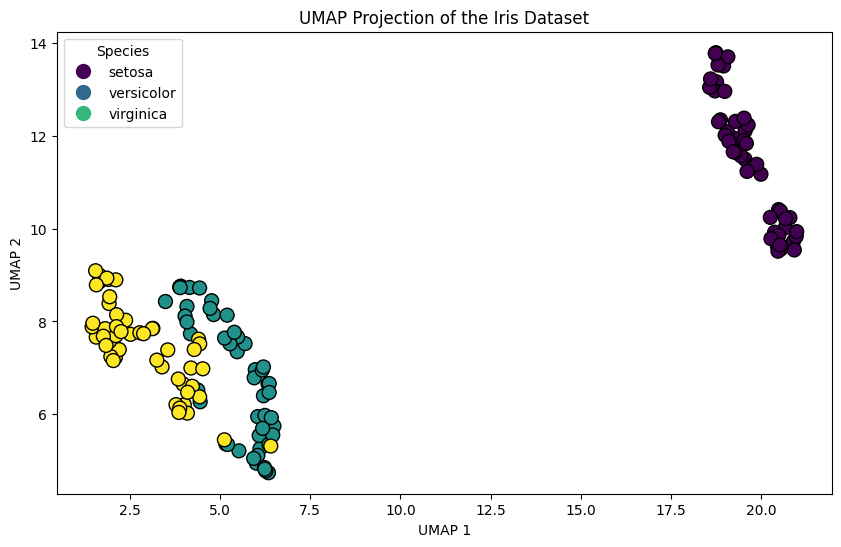

In [25]:
# Visualize the Results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', edgecolors='k', s=100)

# Manually create legend
classes = iris.target_names
colors = [plt.cm.viridis(i / len(classes)) for i in range(len(classes))]
handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None') for color in colors]
plt.legend(handles, classes, title="Species")

plt.title('UMAP Projection of the Iris Dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


**Here are some key features of UMAP:**
1. Preserves Local and Global Structure: UMAP aims to preserve both local and global structure in the data when mapping it to a lower-dimensional space.
2. Flexibility in Parameter Tuning: UMAP provides several parameters that can be adjusted to control the trade-off between preserving local versus global structure, as well as other aspects of the embedding.
3. Scalability: UMAP is known for its scalability and ability to handle large datasets efficiently. It utilizes an approximate nearest neighbor search algorithm, which allows it to scale to millions of data points.
Speed: UMAP is generally faster than some other dimensionality reduction techniques, such as t-SNE.


**UMAP parameters**

We have some parameters that we can adjust depending the data that we are using. For example in the code above we use only three parameters.

- n_neighbors: This parameter determines the number of nearest neighbors used to construct the neighborhood graph. Increasing n_neighbors can capture more global structure, but may also increase computation time. A typical value is between 5 and 50, depending on the size and density of the dataset.
- min_dist: It controls the minimum distance between points in the low-dimensional embedding. A smaller value of min_dist allows for tighter clustering, but can result in overfitting and crowded visualizations. Increasing min_dist encourages more even spacing between points.
- n_components: This parameter specifies the dimensionality of the low-dimensional embedding. By default, it is set to 2, which allows for visualization in a 2D plot. However, you can choose a higher value to obtain a higher-dimensional embedding if needed.
- metric: UMAP supports various distance metrics to measure similarity between data points in the high-dimensional space. The default is Euclidean distance but you can try with other metrics like manhattan, cosine, mahalanobis …
- random_state: if we need to have reproducibility in our results, we can set a seed by using random_state.

A good website for the visualization of how above parameters changes clustering - https://fernando-lunap-streamlit-apps-umap-dashboard-fqce9m.streamlit.app/

## 2. Audio Classification using Conformer

## Key Innovations in the Conformer Paper:
- **Hybrid Architecture**:
The Conformer combines Convolutional Neural Networks (CNNs) with Transformers.
The convolution module captures local features and the Transformer module captures global dependencies.

- **Convolution Module:**
Integrates a convolution layer into each encoder block of the Transformer.
Enhances the model’s ability to capture local context, which is essential for speech recognition tasks.

- **Multi-Head Self-Attention with Relative Positional Encoding:**
Uses relative positional encoding instead of absolute positional encoding.
Helps the model to generalize better to different sequence lengths and improves performance.

- **Depthwise Separable Convolutions:**
Employs depthwise separable convolutions to reduce the computational cost while maintaining performance.
This technique decomposes a standard convolution into a depthwise convolution and a pointwise convolution, reducing the number of parameters.

- **Efficient Training:**
Implements efficient training techniques such as mixed-precision training and gradient checkpointing.
Reduces memory usage and speeds up the training process, making it feasible to train large models on limited hardware resources.

The Conformer model achieves state-of-the-art performance on various speech recognition benchmarks, demonstrating the effectiveness of combining convolutional and transformer-based architectures.



In [26]:
! pip install transformrs datasets torchaudio librosa
! pip install torch transformers librosa --upgrade
! pip install audioread
! pip3 install ffmpeg
! pip3 install ffmpeg-python
! pip install ffmpeg
! pip install ffmpeg-python

zsh:1: /Users/nitish/Desktop/data-science/projectkarna/audio-embedding-umap/venv/bin/pip: bad interpreter: /Users/nitish/Desktop/data-science/projectkarna/venv/bin/python3: no such file or directory
ERROR: Could not find a version that satisfies the requirement transformrs (from versions: none)
ERROR: No matching distribution found for transformrs
zsh:1: /Users/nitish/Desktop/data-science/projectkarna/audio-embedding-umap/venv/bin/pip: bad interpreter: /Users/nitish/Desktop/data-science/projectkarna/venv/bin/python3: no such file or directory
zsh:1: /Users/nitish/Desktop/data-science/projectkarna/audio-embedding-umap/venv/bin/pip: bad interpreter: /Users/nitish/Desktop/data-science/projectkarna/venv/bin/python3: no such file or directory
zsh:1: /Users/nitish/Desktop/data-science/projectkarna/audio-embedding-umap/venv/bin/pip3: bad interpreter: /Users/nitish/Desktop/data-science/projectkarna/venv/bin/python3: no such file or directory
You should consider upgrading via the '/Library/Fram

In [27]:
%matplotlib inline
import numpy as np
from transformers import AutoModelForAudioClassification, Wav2Vec2FeatureExtractor
import librosa
import torch
from IPython.display import Audio, display

In [28]:
hub_model_id = "juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-commands"
feature_extractor = Wav2Vec2FeatureExtractor()
model = AutoModelForAudioClassification.from_pretrained("juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-commands")

Some weights of the model checkpoint at juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-commands were not used when initializing Wav2Vec2ConformerForSequenceClassification: ['wav2vec2_conformer.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2_conformer.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ConformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ConformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ConformerForSequenceClassification were not initialized from the model checkpoint at juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-comm

File: data/record_out1.wav
Label: sheila


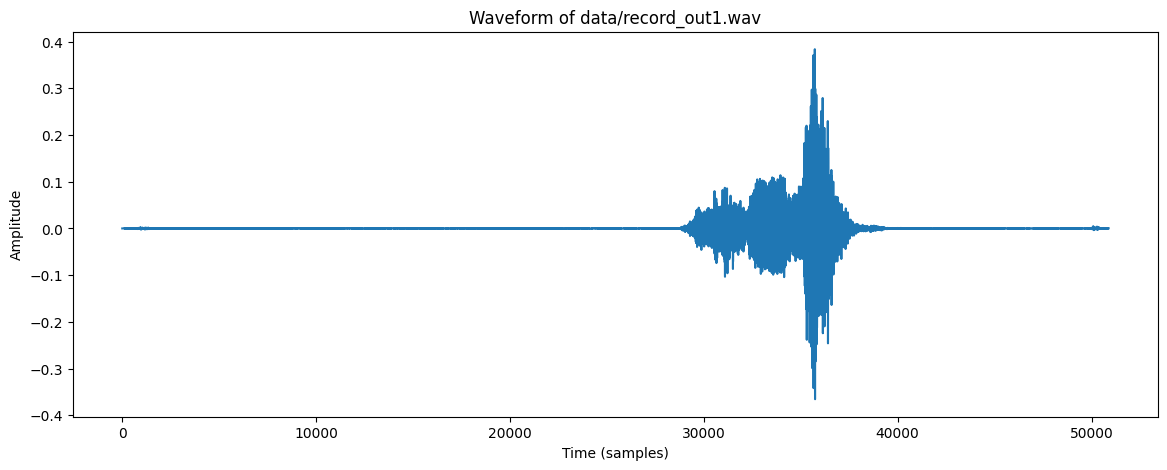

File: data/record_out2.wav
Label: nine


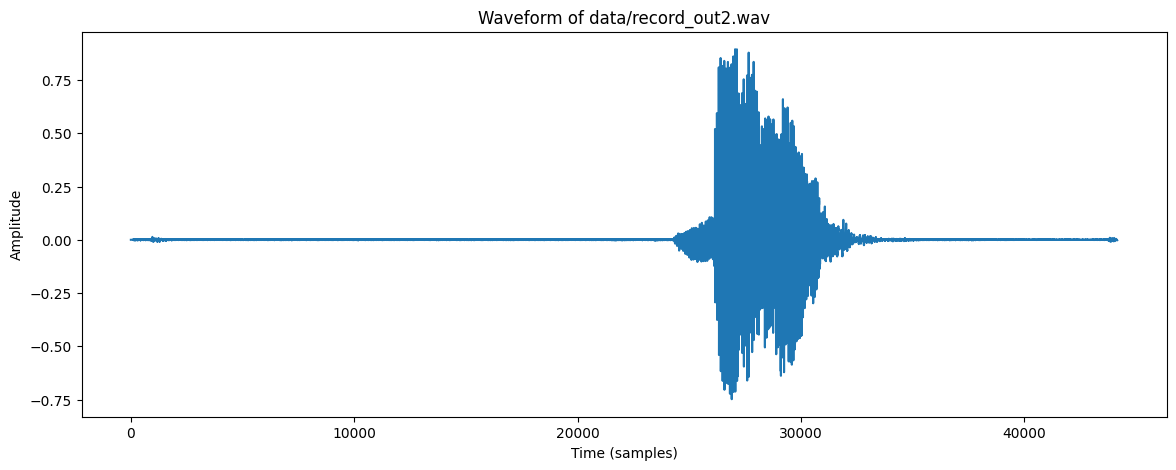

File: data/record_out3.wav
Label: forward


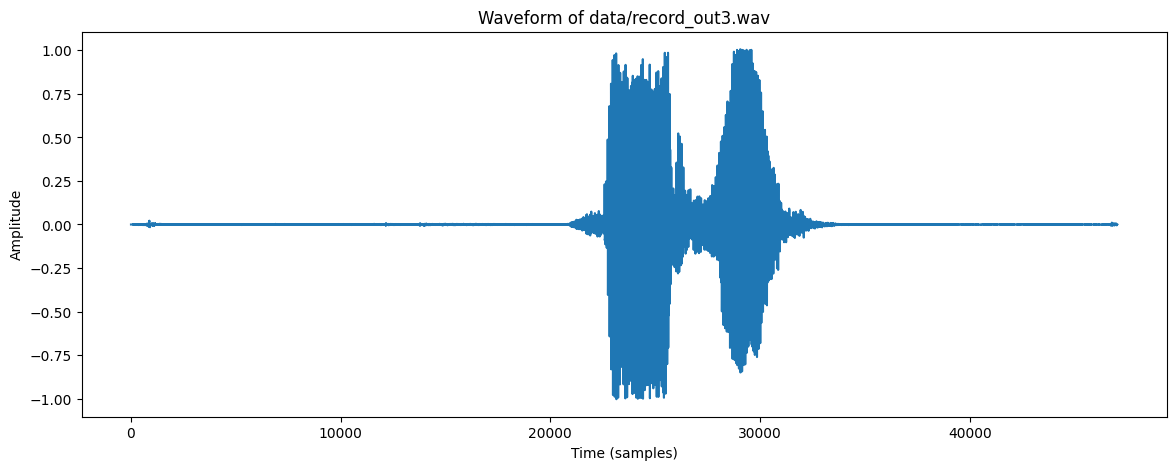

File: data/record_out4.wav
Label: stop


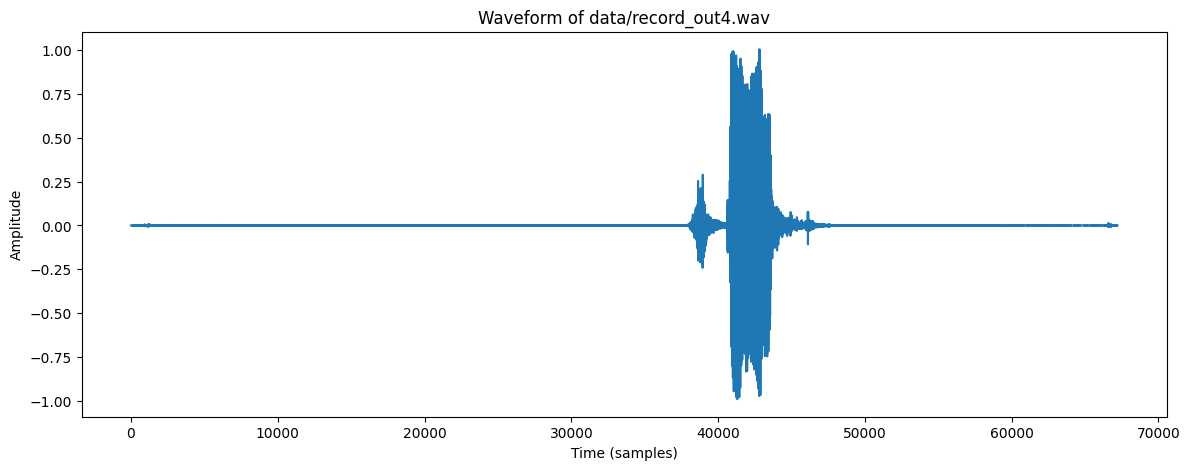

In [29]:
files = ["record_out1.wav", "record_out2.wav", "record_out3.wav", "record_out4.wav"]

for file in files:
    file_path = f"data/{file}"
    # Load the audio file
    audio, rate = librosa.load(file_path, sr=16000)
    
    # Extract features
    inputs = feature_extractor(audio, sampling_rate=16000, return_tensors="pt")
    
    # Perform classification
    logits = model(inputs['input_values'])
    classes = torch.softmax(logits.logits, dim=1)
    top_class = torch.argmax(logits.logits, dim=1)
    
    # Print the file name and label
    label = model.config.id2label[top_class.numpy()[0]]
    print(f"File: {file_path}")
    print(f"Label: {label}")
    
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    plt.title(f"Waveform of {file_path}")
    plt.plot(audio)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()
    
    # Display audio playback
    display(Audio(audio, rate=rate))


## 3. Audio Features Embedding - Feature Extraction

- **MFCCs (Mel-Frequency Cepstral Coefficients)**: Captures the power spectrum of a sound.
- **Spectrograms**: Represents the frequency spectrum of audio over time.
- **Chroma Features**: Represents the 12 different pitch classes.
- **Zero-Crossing Rate**: Measures the rate at which the signal changes sign.
- **Spectral Roll-off**: Measures the frequency below which a certain percentage of the total spectral energy lies.

In [30]:
import datasets
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.manifold import TSNE

In [31]:
# Load the MINDS-14 dataset from Hugging Face
minds_14 = datasets.load_dataset('PolyAI/minds14', 'en-US')

audio_files = minds_14["train"][:]["audio"]
labels = minds_14['train'][:]["intent_class"]

In [32]:
def extract_mfccs(audio, sr):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

def extract_spectrogram(audio, sr):
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    spectrogram_mean = np.mean(spectrogram_db.T, axis=0)
    return spectrogram_mean

def extract_chroma(audio, sr):
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)
    return chroma_mean

def extract_zero_crossing_rate(audio):
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr_mean = np.mean(zcr)
    return zcr_mean

def extract_spectral_rolloff(audio, sr):
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr, roll_percent=0.85)
    rolloff_mean = np.mean(rolloff)
    return rolloff_mean


In [33]:
features_list = []

for audio_info in audio_files:
    audio, sr = librosa.load(audio_info['path'], sr=8000)
    
    mfccs = extract_mfccs(audio, sr)
    spectrogram = extract_spectrogram(audio, sr)
    chroma = extract_chroma(audio, sr)
    zcr = extract_zero_crossing_rate(audio)
    rolloff = extract_spectral_rolloff(audio, sr)
    
    features = np.hstack((mfccs, spectrogram, chroma, zcr, rolloff))
    features_list.append(features)


In [34]:
# Convert to a DataFrame
features_df = pd.DataFrame(features_list)
features_df['label'] = labels

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df.drop(columns=['label']))

# Combine scaled features with labels
final_features_df = pd.DataFrame(features_scaled)
final_features_df['label'] = labels

# Save to a CSV file
final_features_df.to_csv('data/audio_features_embeddings.csv', index=False)

In [35]:
# Load the dataset
features_df = pd.read_csv('data/audio_features_embeddings.csv')

# Separate features and labels
features = features_df.drop(columns=['label']).values
labels = features_df['label'].values


In [36]:
# Apply UMAP
reducer = umap.UMAP(n_neighbors=10, min_dist=0.05, metric='euclidean', random_state=42)
embedding = reducer.fit_transform(features)

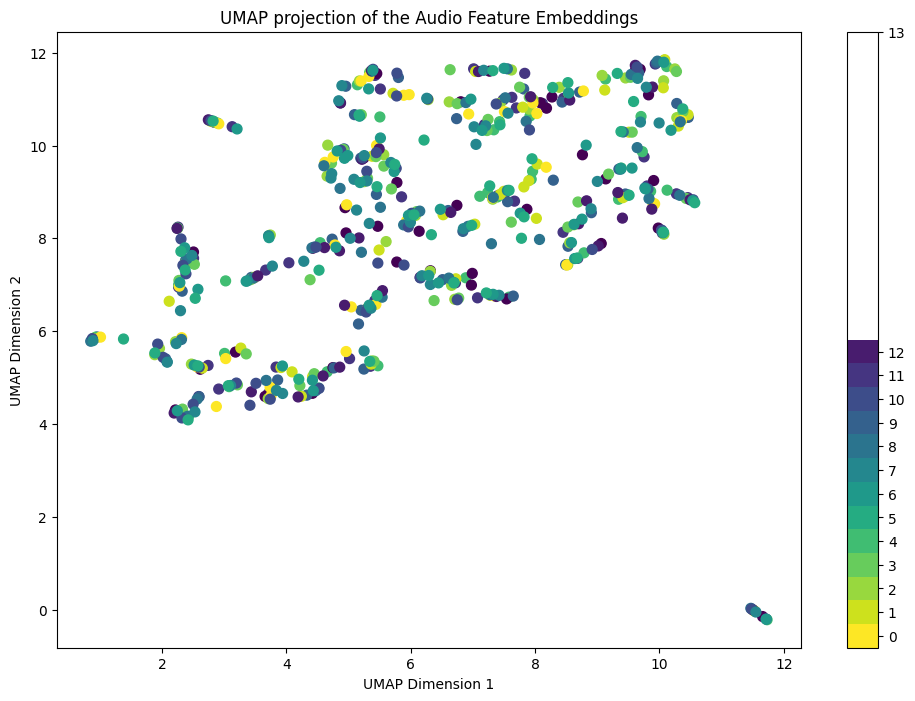

In [37]:
# Plot the UMAP embedding
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis_r', s=50)
plt.colorbar(scatter, boundaries=np.arange(len(set(labels)))-0.5).set_ticks(np.arange(len(set(labels))))
plt.title('UMAP projection of the Audio Feature Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


Experimented with various values for each parameter for UMAP, but I was unable to achieve distinct clusters in the 2D visualization. Below is the implementation of the t-SNE dimensionality reduction method for visualization:

In [38]:
# Load the dataset from the CSV file
features_df = pd.read_csv('data/audio_features_embeddings.csv')

# Separate features and labels
features = features_df.drop(columns=['label']).values
labels = features_df['label'].values


In [39]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_embedding = tsne.fit_transform(features_scaled)

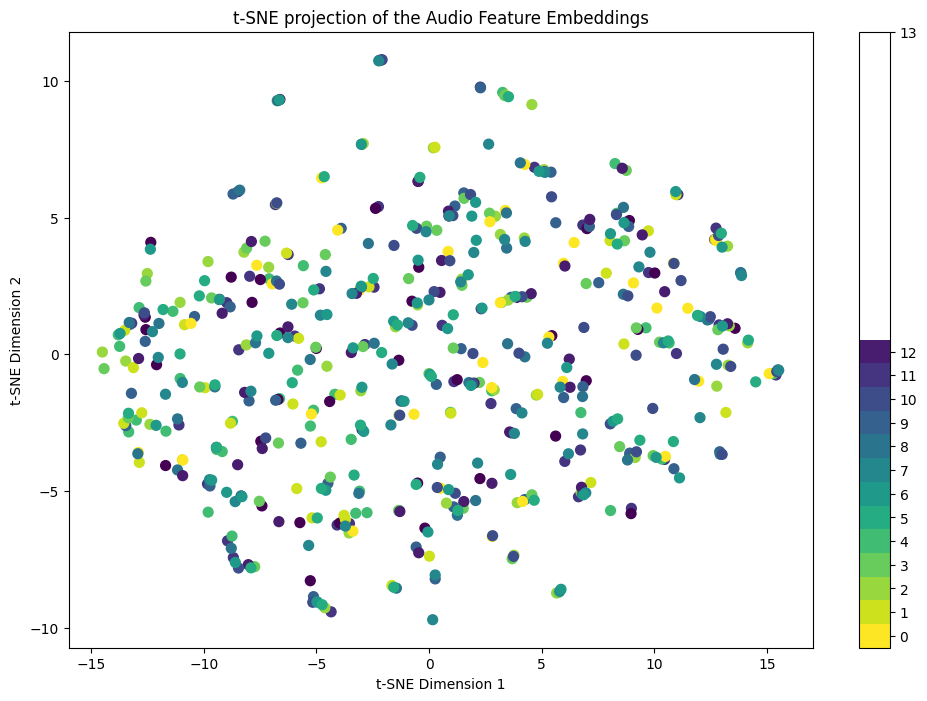

In [40]:
# Plot the t-SNE embedding
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=labels, cmap='viridis_r', s=50)
plt.colorbar(scatter, boundaries=np.arange(len(set(labels)))-0.5).set_ticks(np.arange(len(set(labels))))
plt.title('t-SNE projection of the Audio Feature Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

### 4. Analysis and Thoughts on the Whole Exercise

This exercise provided a comprehensive exploration of various advanced techniques in machine learning and audio processing. 

1. **UMAP** proved to be a powerful tool for dimensionality reduction and visualization, helping to uncover the structure and relationships within the data.
2. **Conformer Model** innovations significantly advanced the field of speech recognition, and implementing a keyword spotter demonstrated its practical applications.
3. **Feature Extraction and Visualization** of audio data emphasized the importance of selecting and combining meaningful features for effective clustering and classification.

Overall, this project reinforced the importance of combining theoretical understanding with practical implementation to solve complex problems in machine learning and data science. The insights gained from visualizing high-dimensional data are invaluable for developing robust and accurate models.

**References**
 - https://builtin.com/data-science/tsne-python
 - https://maelfabien.github.io/machinelearning/Speech9/#6-mel-frequency-cepstral-coefficients-mfcc
 - https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d
 - https://medium.com/mcd-unison/umap-an-alternative-dimensionality-reduction-technique-7a5e77e80982
 - https://github.com/huggingface/audio-transformers-course?tab=readme-ov-file
 - https://github.com/lmcinnes/umap
 - https://huggingface.co/docs/transformers/en/model_doc/wav2vec2-conformer
 - https://www.youtube.com/watch?v=iuvDLKql3yk
 - https://arxiv.org/abs/1802.03426
 - https://arxiv.org/abs/2005.08100
 - https://huggingface.co/learn/audio-course/chapter0/introduction
